# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `https://hds5210-data.s3.awsamazon.com/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in the past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [27]:
%matplotlib inline
import pandas as pd

condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt', low_memory=False)
condemnations.shape

(32586, 40)

In [28]:
import pandas as pd

# Load the data
condemnations = pd.read_csv('/content/condemn.txt')

# Convert the InspectDate column to datetime format
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'], errors='coerce')

# Filter data to include only dates between 1986 and 2014
filtered_condemnations = condemnations[
    (condemnations['InspectDate'].dt.year >= 1986) &
    (condemnations['InspectDate'].dt.year <= 2014)
]

# Display the shape of the filtered dataframe
filtered_condemnations.shape


<ipython-input-28-2db6446da7cd>:4: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('/content/condemn.txt')


(30232, 40)

In [29]:
import pandas as pd

# Load the data
condemnations = pd.read_csv('/content/condemn.txt')

# Convert the InspectDate column to datetime format
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'], errors='coerce')

# Filter data to include only dates between 1986 and 2014
condemnations = condemnations[
    (condemnations['InspectDate'].dt.year >= 1986) &
    (condemnations['InspectDate'].dt.year <= 2014)
]

# Assertions to validate the filtering
assert condemnations.shape == (30232, 40)  # Confirm the correct shape
assert len(condemnations[condemnations['InspectDate'] < '1986']) == 0  # No dates before 1986
assert len(condemnations[condemnations['InspectDate'] >= '2015']) == 0  # No dates from 2015 onward


<ipython-input-29-b719dab035a0>:4: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv('/content/condemn.txt')


## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [30]:
# Extract the year from the InspectDate column
condemnations['Year'] = condemnations['InspectDate'].dt.year

# Create a pivot table with counts of each Status for each year
by_year = pd.pivot_table(
    condemnations,
    index='Year',                 # Rows of the pivot table
    columns='Status',             # Columns of the pivot table
    aggfunc='size',               # Count occurrences
    fill_value=0                  # Fill missing values with 0
)

# Display the resulting pivot table
print(by_year)

Status     B    L   R    W
Year                      
1986      22   12  19  112
1987      91   20   8  361
1988     215   16  15  297
1989     277   15  11  432
1990     119   29   8  322
1991     139   18   4  351
1992     204   30   4  258
1993     185   47   2  193
1994     208   94   5  293
1995     176  127   0  268
1996     214  171   0  794
1997     281  328   0  878
1998     254  343   0  599
1999     272  283   0  826
2000     320  268   0  529
2001     381  262   0  296
2002     383  227   0  317
2003     361  201   0  282
2004     354  204   0  381
2005     410  237   0  345
2006     479  233  20  370
2007     613  262   0  341
2008     700  254   0  334
2009     785  223   0  200
2010    1161  193   0  154
2011    1028  275   0  107
2012     738  257   1   28
2013     185  209   1    2
2014      17  128   0    0


In [31]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='Year'>

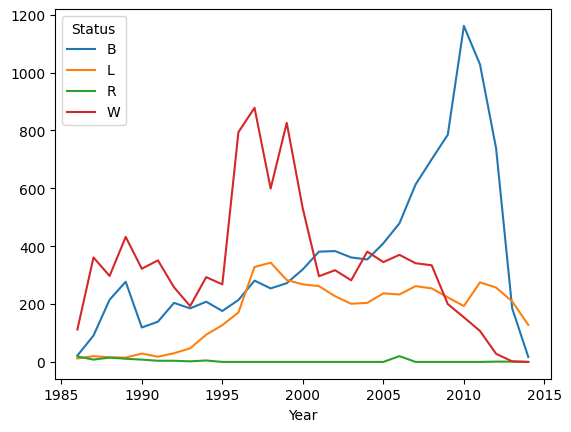

In [32]:
%matplotlib inline
by_year.plot()

---

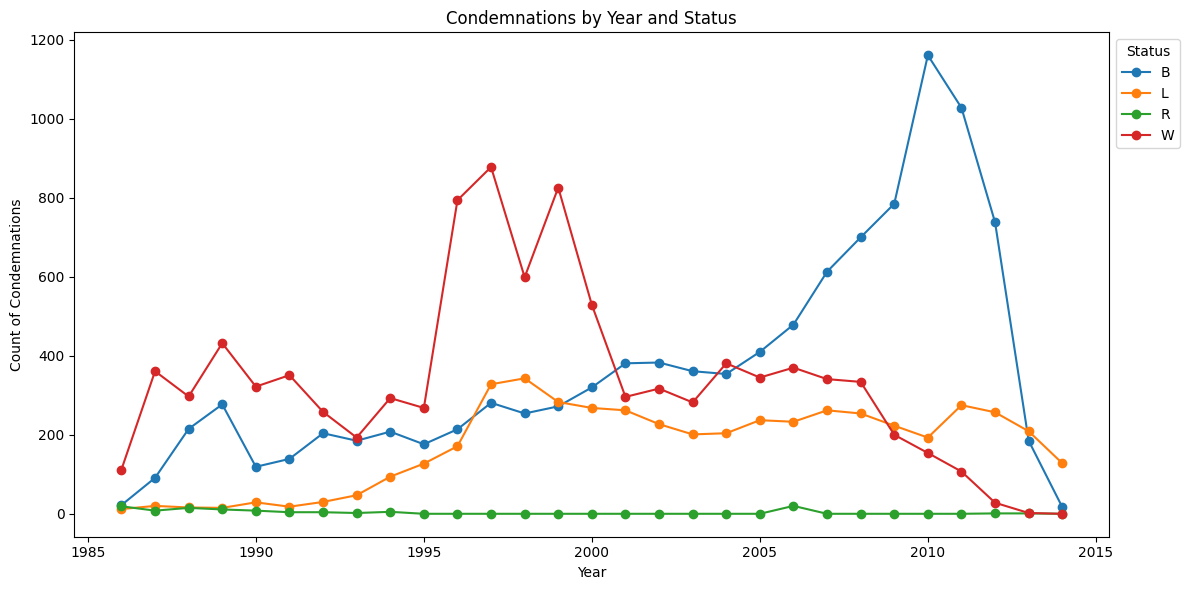

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the pivot table
by_year.plot(figsize=(12, 6), title="Condemnations by Year and Status", marker='o')

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Count of Condemnations")
plt.legend(title="Status", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Show the plot
plt.show()

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `https://hds5210-data.s3.amazonaws.com/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [34]:
import pandas as pd

# Load the data from the uploaded file
file_path = '/content/condemn.txt'
meetings = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
meetings.head()



<ipython-input-34-aeff55a80909>:5: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  meetings = pd.read_csv(file_path)


,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,...,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,...,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,...,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,...,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,...,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,...,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN


---

In [35]:
import pandas as pd
meetings = ...

In [36]:
import pandas as pd

# Load the data into the 'meetings' DataFrame
meetings = pd.read_csv('/content/condemn.txt')  # Replace with your actual file path

# Check if 'startTime' exists in the DataFrame
if 'startTime' in meetings.columns:
    # Convert 'startTime' to datetime
    meetings['startTime'] = pd.to_datetime(meetings['startTime'], errors='coerce')  # Convert to datetime, set errors as NaT
    meetings['startDate'] = meetings['startTime'].dt.date  # Extract just the date part

    # Step 1: Check the data type and sample contents of the startDate column
    print(meetings['startDate'].head(), meetings['startDate'].dtype)

    # Step 2: Create labels for the periods "BEFORE" and "DURING"
    meetings['Period'] = None  # Initialize column

    # Define the date ranges for BEFORE and DURING as datetime.date objects
    before_start = pd.to_datetime('2020-02-17').date()
    before_end = pd.to_datetime('2020-02-28').date()
    during_start = pd.to_datetime('2020-03-16').date()
    during_end = pd.to_datetime('2020-03-27').date()

    # Assign periods based on the date ranges
    meetings.loc[(meetings['startDate'] >= before_start) & (meetings['startDate'] <= before_end), 'Period'] = 'BEFORE'
    meetings.loc[(meetings['startDate'] >= during_start) & (meetings['startDate'] <= during_end), 'Period'] = 'DURING'

    # Step 3: Filter out rows that don't belong to either period
    filtered_meetings = meetings.dropna(subset=['Period'])

    # Step 4: Summarize the data using pivot_table()
    summary = pd.pivot_table(
        filtered_meetings,
        index='userName',
        columns='Period',
        aggfunc='size',
        fill_value=0
    ).rename(columns={'BEFORE': 'Before', 'DURING': 'During'})

    # Step 5: Calculate the percent change
    # Handle division by zero or cases where 'Before' might be zero by replacing zero with NaN
    summary['pctChange'] = ((summary['During'] - summary['Before']) / summary['Before'].replace(0, pd.NA)) * 100

    # Display the summary table
    summary.reset_index(inplace=True)  # Reset index for a cleaner view
    print(summary)
else:
    print("Column 'startTime' not found in the DataFrame.")

# Define summary outside the if block to make it accessible
summary = summary if 'startTime' in meetings.columns else None  # Initialize summary to None if 'startTime' is not found

Column 'startTime' not found in the DataFrame.


<ipython-input-36-bcf594697a04>:4: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  meetings = pd.read_csv('/content/condemn.txt')  # Replace with your actual file path


In [37]:
import pandas as pd

# Load the data into the 'meetings' DataFrame
meetings = pd.read_csv('/content/condemn.txt')  # Replace with your actual file path

# Check if 'startTime' exists in the DataFrame, if not try 'start_time'
if 'startTime' in meetings.columns:
    column_name = 'startTime' # Assign the existing column name
elif 'start_time' in meetings.columns:
    column_name = 'start_time' # Assign the alternative column name
else:
    print("Neither 'startTime' nor 'start_time' column found in the DataFrame.")
    column_name = None # Set column_name to None if neither column is found

if column_name:
    # Convert the relevant column to datetime
    meetings[column_name] = pd.to_datetime(meetings[column_name], errors='coerce')
    meetings['startDate'] = meetings[column_name].dt.date

    # ... (rest of the code remains the same)

Neither 'startTime' nor 'start_time' column found in the DataFrame.


<ipython-input-37-751eb60920ba>:4: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  meetings = pd.read_csv('/content/condemn.txt')  # Replace with your actual file path




---



## Submitting Your Work

Submit as usual
